In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [14]:
cd D:\MLOPS\USA_Rain_Prediction_MLProject

D:\MLOPS\USA_Rain_Prediction_MLProject


In [15]:
df = pd.read_csv(r'Data\usa_rain_prediction.csv')
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [17]:
df.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

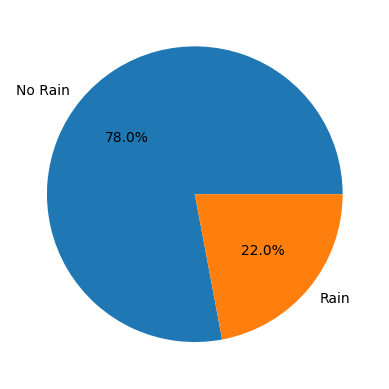

In [18]:
def data_balance(df):
  df['Rain Tomorrow'].value_counts()
  plt.pie(df['Rain Tomorrow'].value_counts(),labels=['No Rain','Rain'],autopct='%1.1f%%')
  plt.show()

data_balance(df)


In [19]:
df['Location'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Indianapolis',
       'Charlotte', 'San Francisco', 'Seattle', 'Denver',
       'Washington D.C.'], dtype=object)

# Target Variable Analysis

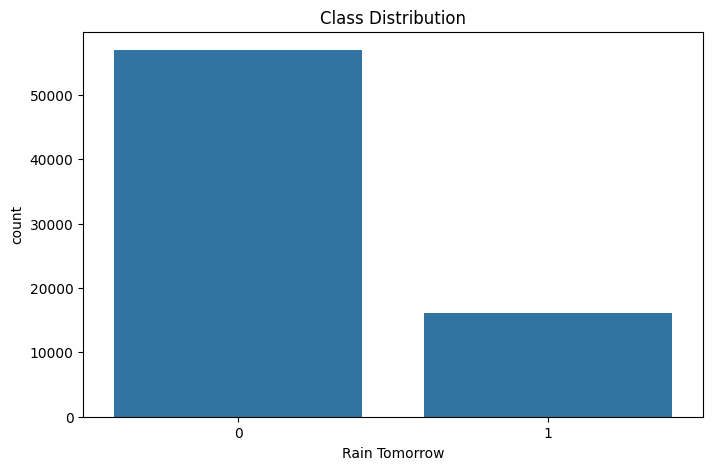

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rain Tomorrow', data=df)
plt.title('Class Distribution')
plt.show()

# Temporal Analysis

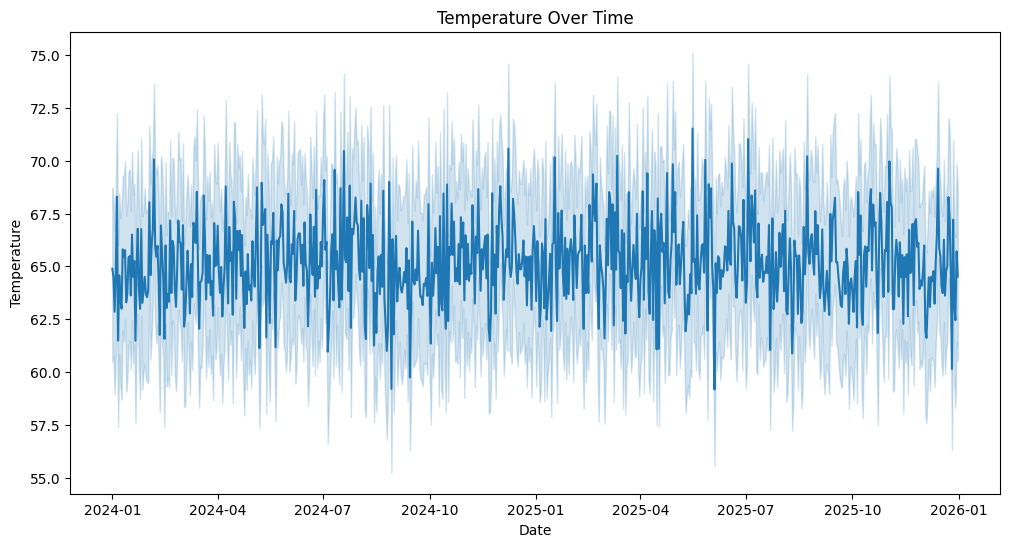

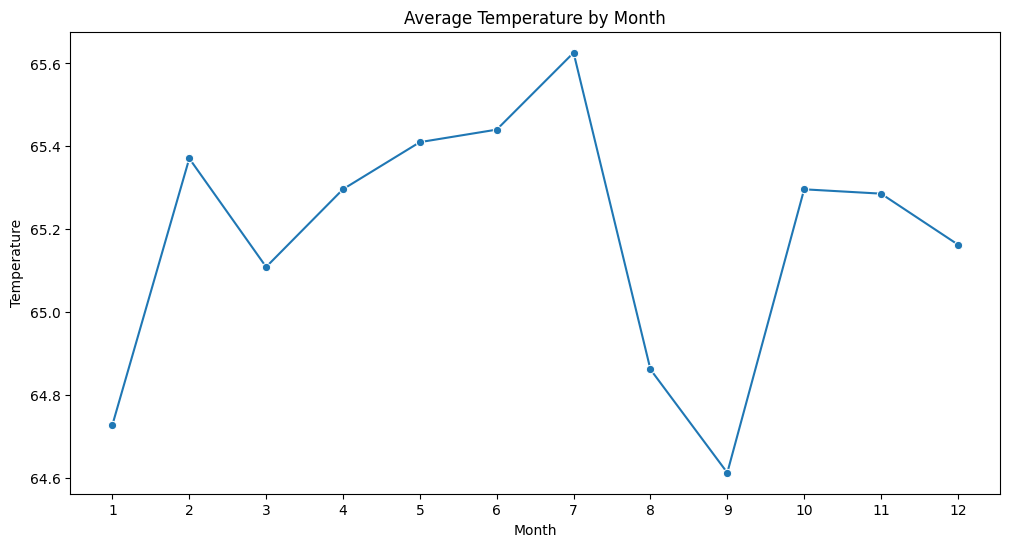

In [21]:
df['Date'] = pd.to_datetime(df['Date'])


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Time series of temperature
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Temperature', data=df)
plt.title('Temperature Over Time')
plt.show()

# Monthly aggregation
monthly_agg = df.groupby('Month').agg({
    'Temperature': 'mean',
    'Rain Tomorrow': 'mean'
}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Temperature', data=monthly_agg, marker='o')
plt.title('Average Temperature by Month')
plt.xticks(range(1,13))
plt.show()

# Feature Distributions

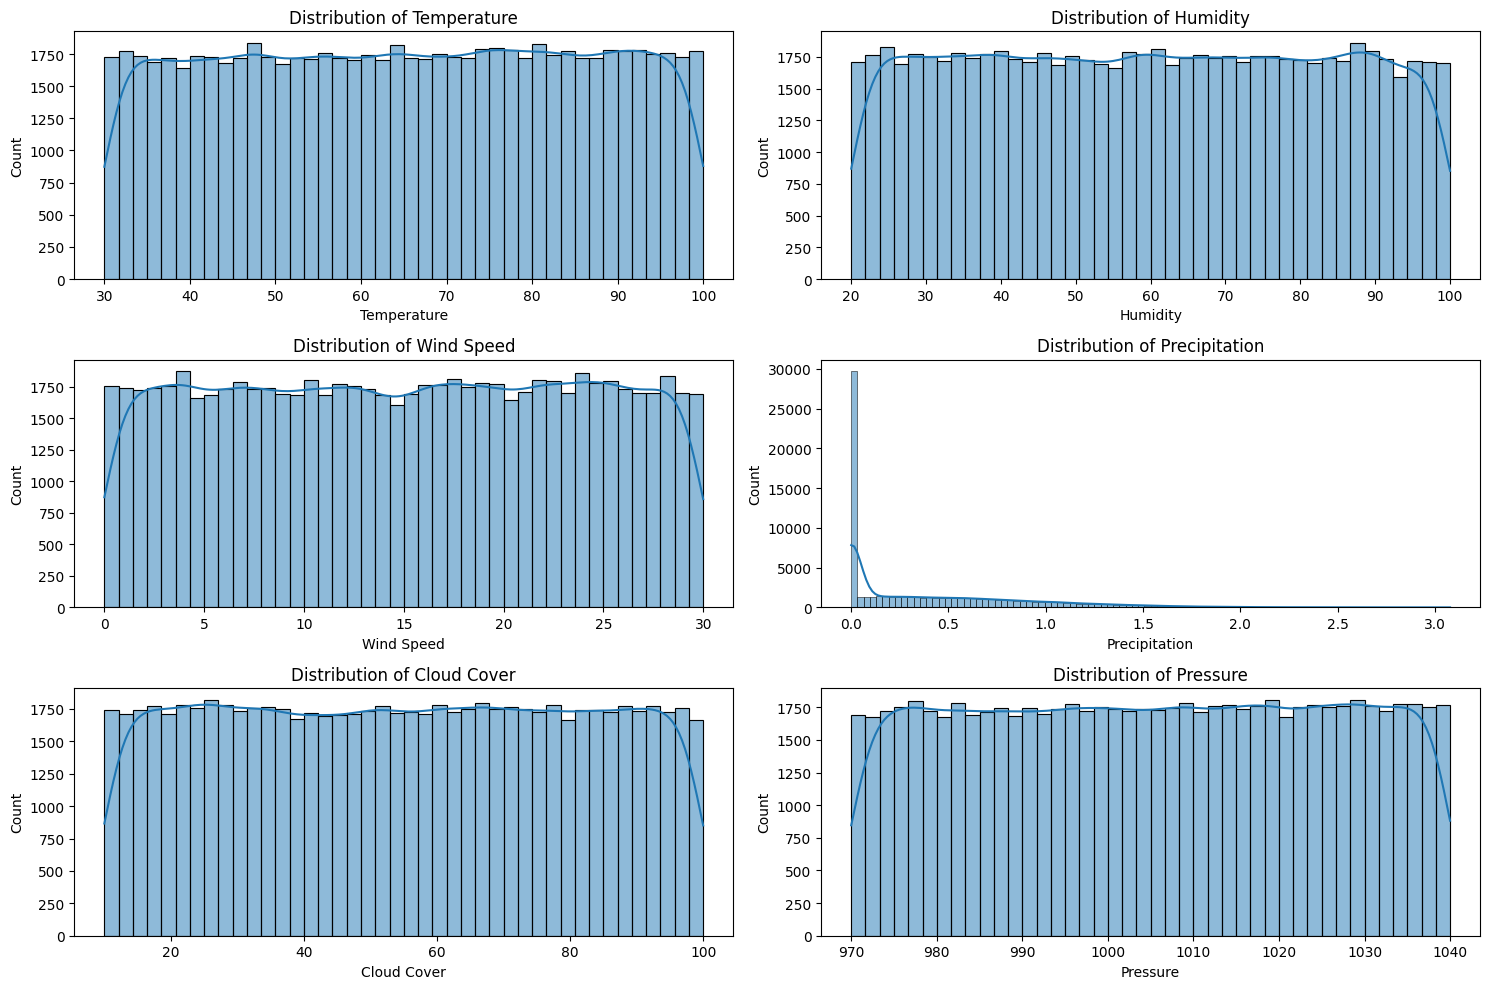

In [22]:
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 
                     'Precipitation', 'Cloud Cover', 'Pressure']

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation Analysis

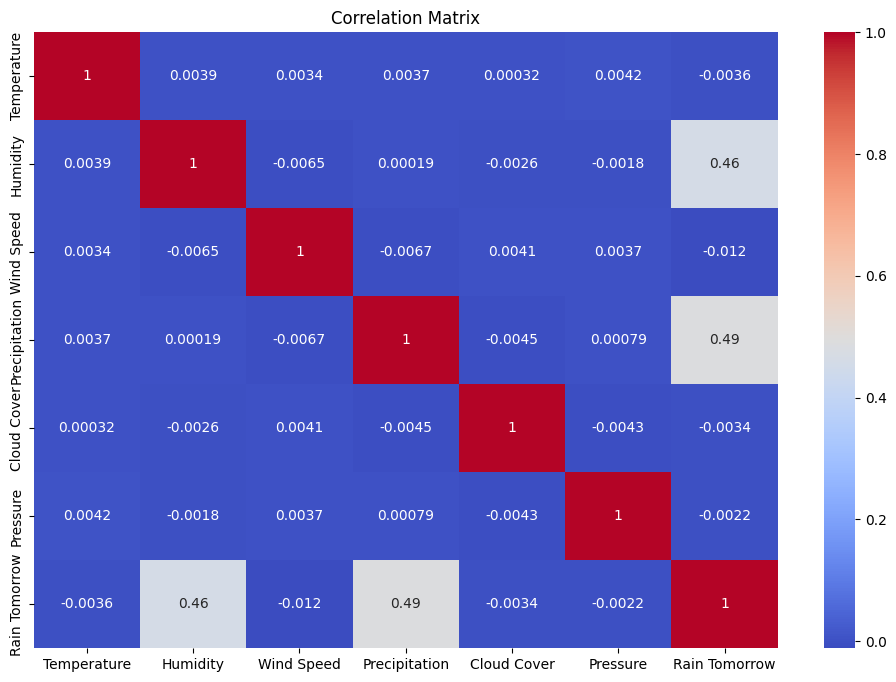

In [23]:
plt.figure(figsize=(12,8))
corr_matrix = df[numerical_features + ['Rain Tomorrow']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Outlier Detection

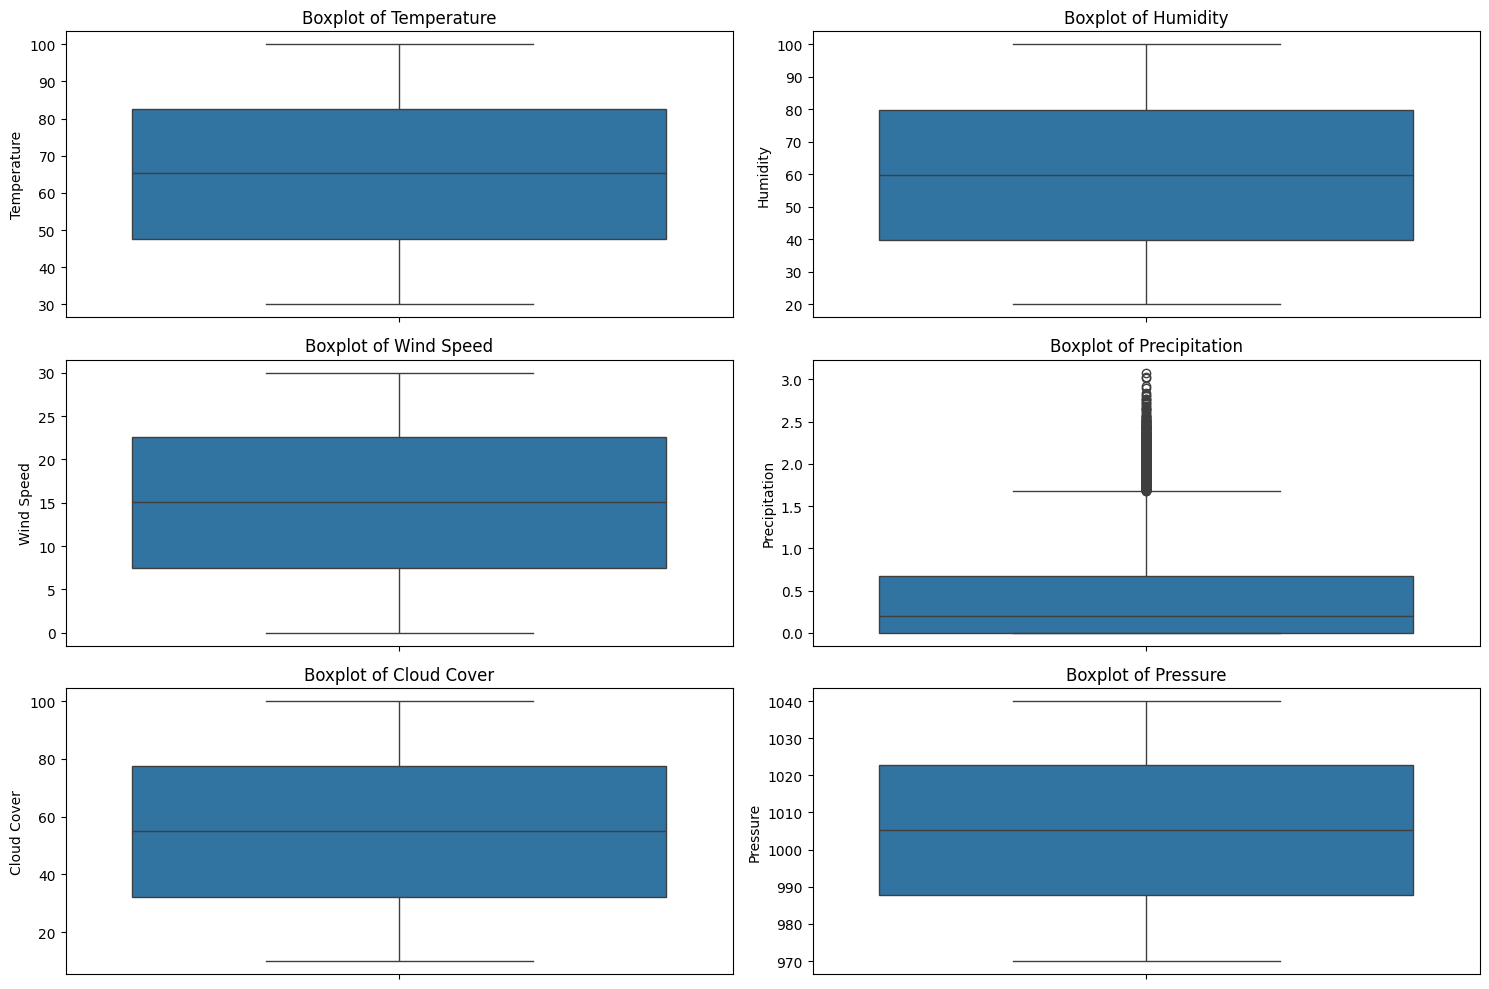

In [24]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3,2,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Feature vs Target Analysis

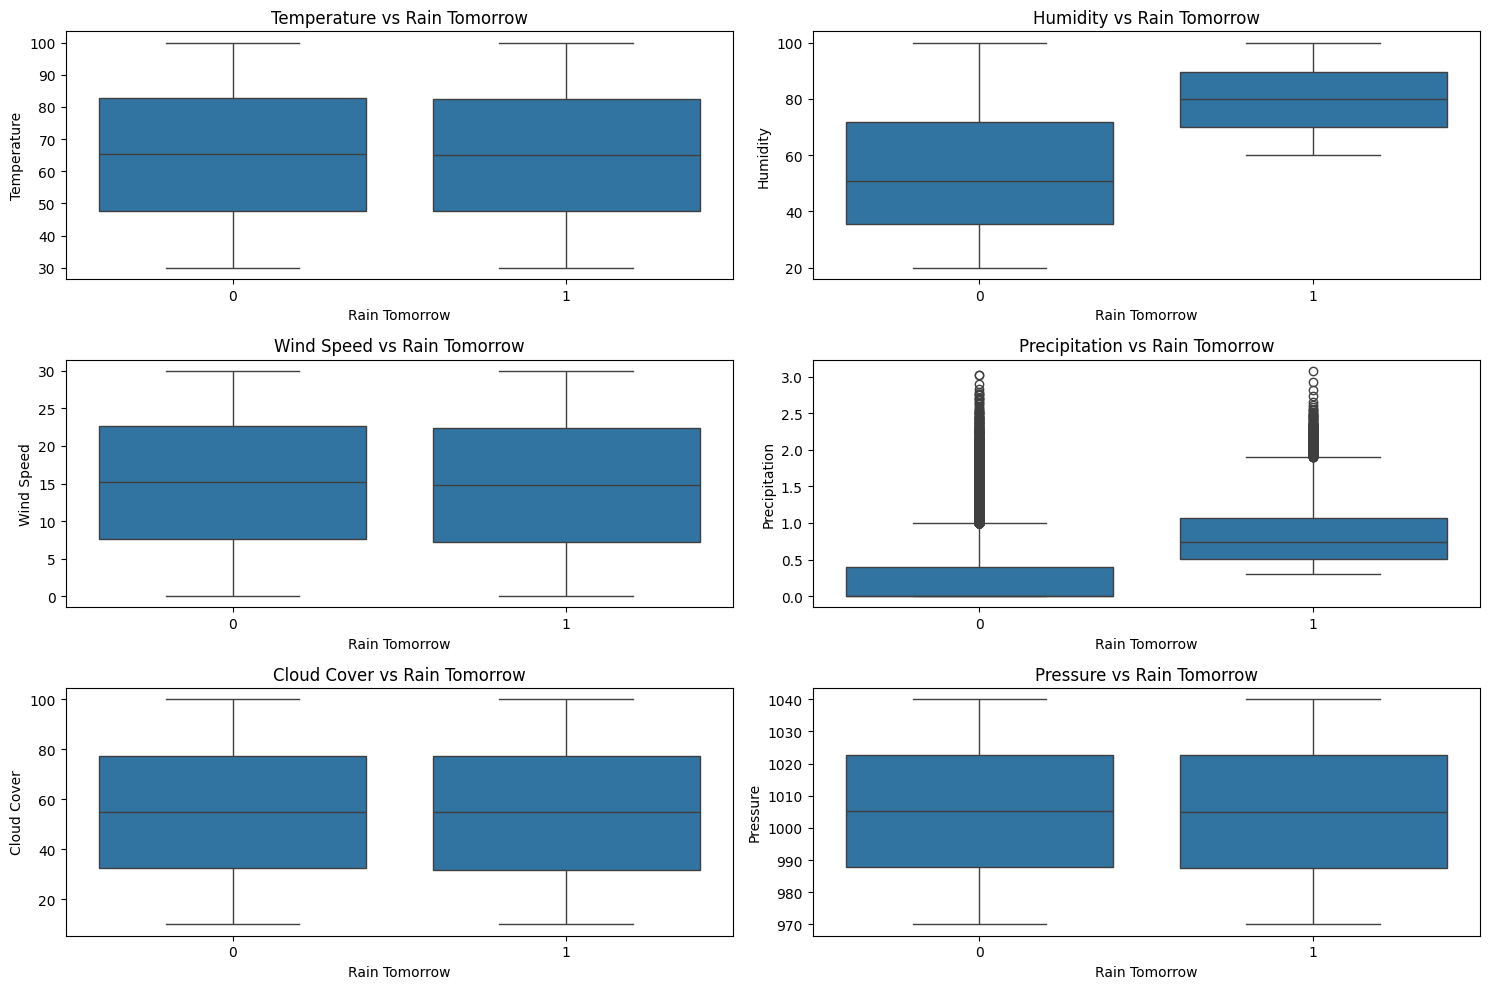

In [25]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3,2,i)
    sns.boxplot(x='Rain Tomorrow', y=col, data=df)
    plt.title(f'{col} vs Rain Tomorrow')
plt.tight_layout()
plt.show()

# Advance analysis

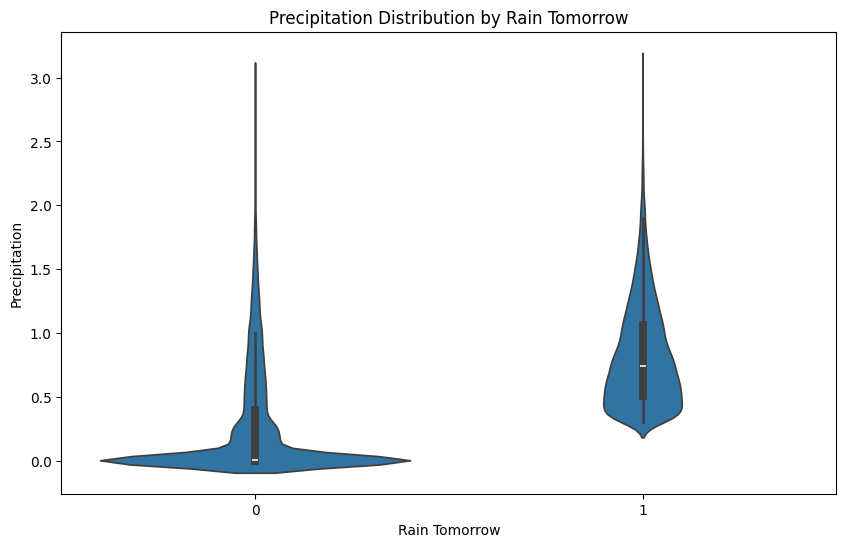

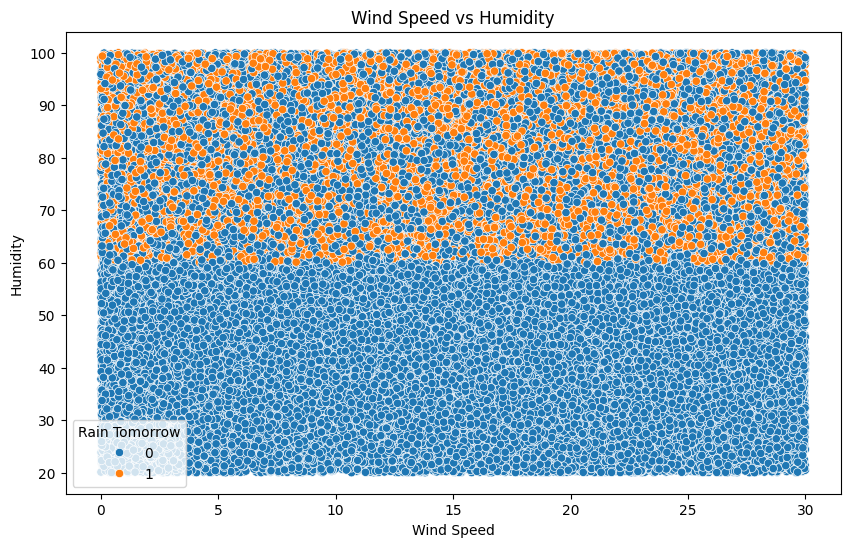

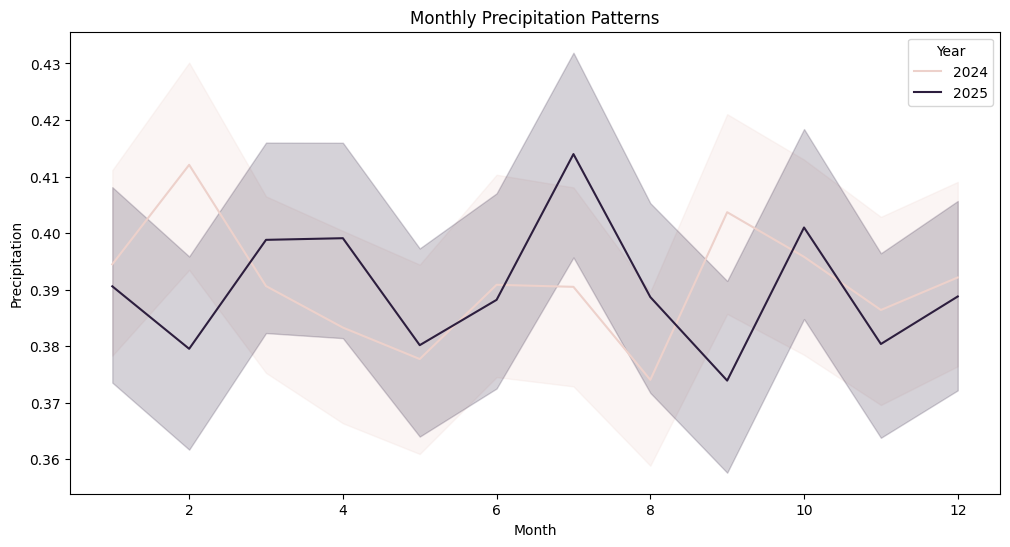

In [26]:
# Precipitation vs Rain Tomorrow
plt.figure(figsize=(10,6))
sns.violinplot(x='Rain Tomorrow', y='Precipitation', data=df)
plt.title('Precipitation Distribution by Rain Tomorrow')
plt.show()

# Wind Speed vs Humidity colored by Rain Tomorrow
plt.figure(figsize=(10,6))
sns.scatterplot(x='Wind Speed', y='Humidity', hue='Rain Tomorrow', data=df)
plt.title('Wind Speed vs Humidity')
plt.show()

# Temporal patterns in precipitation
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Precipitation', hue='Year', data=df, estimator='mean')
plt.title('Monthly Precipitation Patterns')
plt.show()

# Data Training and Testing

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [28]:
df.columns

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow', 'Year',
       'Month', 'Day'],
      dtype='object')

In [29]:
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 
                     'Precipitation', 'Cloud Cover', 'Pressure']
cat_features = ['Location']

In [30]:
models = {
  "Logistic regression" : LogisticRegression(),
  "Decision Tree" : DecisionTreeClassifier(),
  "Support Vector Machine" : SVC(),
  "Random Forest" : RandomForestClassifier(),
  "K-Nearest Neighbors" : KNeighborsClassifier()
}

params = {
  "Logistic regression" : { 
    "C":[0.01, 0.1, 1, 10, 100],
    "penalty":["l1", "l2"],
    "solver":["liblinear", "saga"],
    "max_iter":[100, 1000, 10000]    

  },
  "Decision Tree" : {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "min_samples_split" : [2, 5, 10]
  },
  "Support Vector Machine" : {
    "C" : [0.1, 1, 10],
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "gamma" : ["scale", "auto"]
  },
  "Random Forest" : {
    "n_estimators" : [10, 100, 1000],
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "min_samples_split" : [2, 5, 10]
  },
  "K-Nearest Neighbors" : {
    "n_neighbors" : [3, 5, 7, 9, 11],
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
    }
}

In [31]:
X = df.drop('Rain Tomorrow', axis=1)
Y = df['Rain Tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
col_transformer = ColumnTransformer([
    ('Numerical features', StandardScaler(), numerical_features),
    ('Categorical features', OneHotEncoder(drop='first'), cat_features)
])


X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray())
X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray())


In [33]:
for i in range(len(list(models))):
  model = list(models.values())[i]
  para = list(params.values())[i]

  gs = GridSearchCV(model, para, cv=3, verbose=1, n_jobs=-1)
  gs.fit(X_train_transformed, y_train)
  
  y_predict = gs.predict(X_test_transformed)
  
  # Calculate metrics using the imported functions
  cm = confusion_matrix(y_test, y_predict)
  acc = accuracy_score(y_test, y_predict)
  cr = classification_report(y_test, y_predict)
  
  print(f"Best Parameters: {gs.best_params_}")
  print(f"Accuracy: {acc:.4f}")
  print("Confusion Matrix:")
  print(cm)
  print("Classification Report:")
  print(cr)
  print("\n" + "="*50 + "\n")

  


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9092
Confusion Matrix:
[[11000   369]
 [  958  2293]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11369
           1       0.86      0.71      0.78      3251

    accuracy                           0.91     14620
   macro avg       0.89      0.84      0.86     14620
weighted avg       0.91      0.91      0.91     14620



Fitting 3 folds for each of 132 candidates, totalling 396 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 1.0000
Confusion Matrix:
[[11369     0]
 [    0  3251]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11369
           1       1.00      1.00      1.00      3251

    accuracy    

KeyboardInterrupt: 